# 퍼셉트론
- 이진분류 : 임의의 샘플 데이터를 True나 False로 구분하는 문제
- 퍼셉트론의 전체 구조 : 선형 회귀와 유사 / 마지막 단계에서 샘플을 이진 분류하기 위해 계단 함수 사용
- 계단 함수 : z가 0보다 크거나 같으면 1(양성 클래스), 0보다 작으면 -1(음성 클래스)로 분류

# 아달린
- 퍼셉트론을 개선한 적응형 선형 뉴런
- 계단 함수 출력 전 역방향 계산

# 로지스틱 회귀
- 아달린에서 조금 더 발전된 형태
- 선형 회귀 -> z -> 활성화 함수 -> a -> 임계 함수 -> y_hat
- 활성화 함수는 비선형 함수를 사용함(로지스틱 회귀에서는 시그모이드 함수를 사용)

# 시그모이드 함수 : 오즈 비>로짓 함수>시그모이드 함수
### 오즈비
- p/(1-p) (p=성공 확률)

### 로짓 함수
- logit(p)=log(p/(1-p))
- p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 음수와 양수가 된다.

### 로지스틱 함수(시그모이드 함수)
- log(p/(1-p))=z를 z에 대해 정리 -> $$p={1 \over 1+e^{-z}}$$

# 로지스틱 손실 함수
- 다중 분류를 위한 손실 함수인 크로스 엔트로피 손실 함수를 이진 분류 버전으로 만든 것
 $$ L=-(ylog(a)+(1-y)log(1-a)) $$
- y=1(양성 클래스), L=-log(a)
- y=0(음성 클래스), L=-log(1-a)
- 가중치에 대한 미분
$$ {\partial \over \partial w_i} L=-(y-a)x_i $$
- 절편에 대한 미분
$$ {\partial \over \partial b} L=-(y-a)1 $$
$$ => w_i=w_i+(y-a)x_i, b=b+(y-a)1 $$ 

In [1]:
# 유방암 데이터 세트 준비하기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [3]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'value')

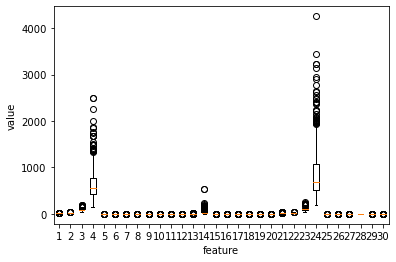

In [5]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')

In [6]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [7]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [8]:
x=cancer.data
y=cancer.target

In [9]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [11]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [13]:
# 로지스틱 회귀 분석하기
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    def forpass(self,x):
        z=np.sum(x*self.w)+self.b # 직선 방정식을 계산합니다.
        return z
    def backprop(self,x,err):
        w_grad =x*err             # 가중치에 대한 그레디언트를 계산합니다.
        b_grad=1*err              # 절편에 대한 그레디언트를 계산합니다.
        return w_grad, b_grad
    # 훈련하는 메서드 구현하기
    def fit(self, x, y, epochs=100):
        self.w=np.ones(x.shape[1]) # 가중치를 초기화합니다.
        self.b=0.5                 # 절편을 초기화합니다. 
        for i in range(epochs):   # epochs만큼 반복합니다.
            for x_i, y_i in zip(x,y): # 모든 샘플에 대해 반복합니다.
                z=self.forpass(x_i)   # 정방향 계산
                a=self.activation(z)  # 활성화 함수 적용
                err=-(y_i-a)          # 오차 계산
                w_grad, b_grad = self.backprop(x_i,err)  #역방향 계산
                self.w -= w_grad  # 가중치 업데이트
                self.b -= b_grad  # 절편 업데이트
    def activation(self,z):
        a=1/(1+np.exp(-z))       # 시그모이드 계산
        return a
    #예측하는 메서드 구현하기
    def predict(self, x):
        z=[self.forpass(x_i) for x_i in x]  # 정방향 계산
        a=self.activation(np.array(z))      # 활성화 함수 적용
        return a>0.5

In [14]:
#로지스틱 회귀 모델 훈련시키기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-13-72e7f55e7309>:26: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))       # 시그모이드 계산


In [15]:
np.mean(neuron.predict(x_test)==y_test)

<ipython-input-13-72e7f55e7309>:26: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))       # 시그모이드 계산


0.8245614035087719

In [16]:
# 단일층 신경망을 구현합니다
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses=[]
    def forpass(self,x):
        z=np.sum(x*self.w)+self.b # 직선 방정식을 계산합니다.
        return z
    def backprop(self,x,err):
        w_grad =x*err             # 가중치에 대한 그레디언트를 계산합니다.
        b_grad=1*err              # 절편에 대한 그레디언트를 계산합니다.
        return w_grad, b_grad
    # 훈련하는 메서드 구현하기
    def fit(self, x, y, epochs=100):
        self.w=np.ones(x.shape[1]) # 가중치를 초기화합니다.
        self.b=0.5                 # 절편을 초기화합니다. 
        for i in range(epochs):   # epochs만큼 반복합니다.
            loss=0
            indexes=np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
            for i in indexes: # 모든 샘플에 대해 반복합니다.
                z=self.forpass(x[i])   # 정방향 계산
                a=self.activation(z)  # 활성화 함수 적용
                err=-(y[i]-a)          # 오차 계산
                w_grad, b_grad = self.backprop(x[i],err)  #역방향 계산
                self.w -= w_grad  # 가중치 업데이트
                self.b -= b_grad  # 절편 업데이트
                a=np.clip(a,1e-10,1-1e-10) # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 에포크마다 평균 손실을 누적합니다.
            self.losses.append(loss/len(y))
                
    def activation(self,z):
        a=1/(1+np.exp(-z))       # 시그모이드 계산
        return a
    #예측하는 메서드 구현하기
    def predict(self, x):
        z=[self.forpass(x_i) for x_i in x]  # 정방향 계산
        return np.array(z)>0
    def score(self,x,y):
        return np.mean(self.predict(x)==y)

# 경사 하강법
### 확률적 경사 하강법
- 샘플 데이터 1개에 대한 그레디언트 계산
- 계산 비용이 적지만 불안정함

### 배치 경사 하강법
- 샘플 데이터 전체에 대한 그레디언트 계산
- 최적값에 수렴하는 과정이 안정적이지만 계산 비용이 많이 듬

### 미니 배치 경사 하강법
- 샘플 데이터에서 무작위로 선택한 일부에 대한 그레디언트 계산
- 확률적 경사 하강법과 배치 경사 하강법의 장점을 절충한 것

In [17]:
# 단일층 신경망 훈련하기
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-16-68c9305768c8>:33: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))       # 시그모이드 계산


0.9298245614035088

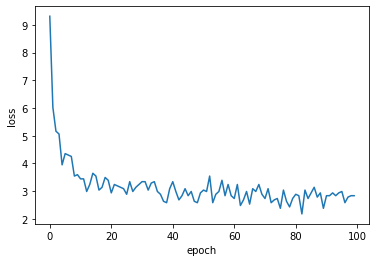

In [18]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
# 사이킷런으로 경사 하강법 적용하기
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [20]:
sgd.fit(x_train,y_train)
sgd.score(x_test,y_test)

0.8333333333333334

In [21]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])